
## Dominant Color Extraction for Image Segmentation
* Image Segmentation
* Segmentation partitions an image into regions having similar visual appearance corresponding to parts of objects
* We will try to extract the most dominant 'K' Colors using K-Means
* We can apply K-Means with each pixel will reassigned to the closest of the K Colors, leading to segmentation

![](ImageSegmentation.png)

In [11]:
#pip install opencv-python

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [13]:
im=cv2.imread('Elephant.png') #reads image in BGR format
print(im.shape)
original_shape=im.shape

(252, 379, 3)


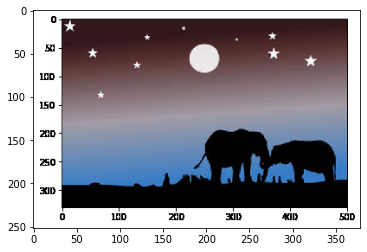

In [14]:
plt.imshow(im) #displays image in RGB format
plt.show()

In [15]:
im=cv2.imread('Elephant.png') #reads image in BGR format
im=cv2.cvtColor(im,cv2.COLOR_BGR2RGB)

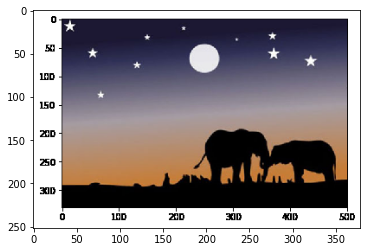

In [16]:
plt.imshow(im)  #Image in real colors
plt.show()

In [17]:
#Flatten Each Channel of the Image
all_pixels=im.reshape((252*379,3))
print(all_pixels.shape)

(95508, 3)


In [18]:
from sklearn.cluster import KMeans

In [67]:
dominant_colors= 5  #Giving the value of K

km=KMeans(n_clusters=dominant_colors)
km.fit(all_pixels)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [68]:
km.cluster_centers_

# These 4 cluster centers are in RGB values of floating integer
# We want RGB values in integer! So we convert them

array([[  1.50703321,   0.90054281,   1.33654351],
       [253.91646064, 253.90162655, 254.10965083],
       [ 98.71137629,  94.95155131, 118.12879873],
       [172.11504358, 141.35170574, 123.49823414],
       [ 38.56030743,  35.80221892,  64.81411925]])

In [69]:
centers=km.cluster_centers_


In [70]:
centers=np.array(km.cluster_centers_,dtype='uint8')

In [71]:
print(centers)

[[  1   0   1]
 [253 253 254]
 [ 98  94 118]
 [172 141 123]
 [ 38  35  64]]


### Plot what all colors are these?

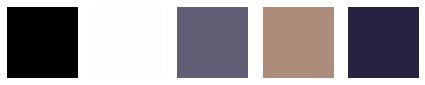

In [72]:
i=1

plt.figure(0,figsize=(15,5))

colors=[]

for each_col in centers: #Each color
    plt.subplot(1,10,i)
    plt.axis("off")
    i+=1
    
    colors.append(each_col)
    
    #Color Swatch
    a=np.zeros((100,100,3),dtype='uint8')
    a[:,:,:]=each_col
    plt.imshow(a)
    
plt.show()







## Segmenting Our Original Image

In [73]:
new_img=np.zeros((252*379,3),dtype='uint8')
print(new_img.shape)

(95508, 3)


In [74]:
colors

[array([1, 0, 1], dtype=uint8),
 array([253, 253, 254], dtype=uint8),
 array([ 98,  94, 118], dtype=uint8),
 array([172, 141, 123], dtype=uint8),
 array([38, 35, 64], dtype=uint8)]

In [75]:
km.labels_   #Given labels 0,1,2,3 by K Means

array([1, 1, 1, ..., 1, 1, 1])

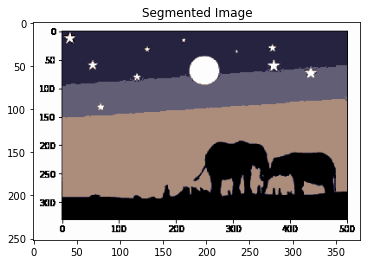

In [76]:
for i in range(new_img.shape[0]):
    new_img[i]=colors[km.labels_[i]]
    
new_img=new_img.reshape((original_shape))

plt.imshow(new_img)
plt.title('Segmented Image')
plt.show()

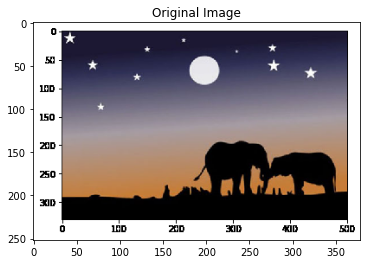

In [77]:
im=cv2.imread('Elephant.png') #reads image in BGR format
im=cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
plt.imshow(im)
plt.title('Original Image')
plt.show()  